In [1]:
import numpy as np
import pandas as pd
import keras as kr
from keras import optimizers
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras import backend as K
from keras import callbacks
from keras import layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
#import scikitplot as skplt
import random
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import time

In [36]:
signals_2016 = pd.read_csv('/Users/Diego/TFG/Datos_2016/signal_2016.txt', sep = '\s+', names=['Lepton_pdgId[0]', 'Lepton_pdgId[1]', 'Lepton_pt[0]','Lepton_pt[1]','mll', 'ptll', 'mth', 'mtw1', 'mtw2', 'PuppiMET_pt', 'TkMET_pt', 'mpmet', 'drll', 'dphill', 'dphilmet', 'dphilmet1', 'dphilmet2']) 
signals_2017 = pd.read_csv('/Users/Diego/TFG/Datos_2017/signal_2017.txt', sep = '\s+', names=['Lepton_pdgId[0]', 'Lepton_pdgId[1]', 'Lepton_pt[0]','Lepton_pt[1]','mll', 'ptll', 'mth', 'mtw1', 'mtw2', 'PuppiMET_pt', 'TkMET_pt', 'mpmet', 'drll', 'dphill', 'dphilmet', 'dphilmet1', 'dphilmet2']) 
signals_2018 = pd.read_csv('/Users/Diego/TFG/Datos_2018/signal_2018.txt', sep = '\s+', names=['Lepton_pdgId[0]', 'Lepton_pdgId[1]', 'Lepton_pt[0]','Lepton_pt[1]','mll', 'ptll', 'mth', 'mtw1', 'mtw2', 'PuppiMET_pt', 'TkMET_pt', 'mpmet', 'drll', 'dphill', 'dphilmet', 'dphilmet1', 'dphilmet2']) 

signals = pd.concat([signals_2016, signals_2017, signals_2018])
signals['type'] = 1

del signals_2016
del signals_2017
del signals_2018

signals.set_axis(range(0, len(signals)), axis='index', inplace=True)
#signals.drop(labels=range(10, len(signals)), axis=0, inplace=True)
signal_np = signals.to_numpy()

GluGluHToWWTo2L2Nu_M125_2016 = pd.read_csv('/Users/Diego/TFG/Datos_2016/GluGluHToWWTo2L2Nu_M125_2016.txt', sep = '\s+', names=['Lepton_pdgId[0]', 'Lepton_pdgId[1]', 'Lepton_pt[0]','Lepton_pt[1]','mll', 'ptll', 'mth', 'mtw1', 'mtw2', 'PuppiMET_pt', 'TkMET_pt', 'mpmet', 'drll', 'dphill', 'dphilmet', 'dphilmet1', 'dphilmet2']) 
GluGluHToWWTo2L2Nu_M125_2017 = pd.read_csv('/Users/Diego/TFG/Datos_2017/GluGluHToWWTo2L2Nu_M125_2017.txt', sep = '\s+', names=['Lepton_pdgId[0]', 'Lepton_pdgId[1]', 'Lepton_pt[0]','Lepton_pt[1]','mll', 'ptll', 'mth', 'mtw1', 'mtw2', 'PuppiMET_pt', 'TkMET_pt', 'mpmet', 'drll', 'dphill', 'dphilmet', 'dphilmet1', 'dphilmet2']) 
GluGluHToWWTo2L2Nu_M125_2018 = pd.read_csv('/Users/Diego/TFG/Datos_2018/GluGluHToWWTo2L2Nu_M125_2018.txt', sep = '\s+', names=['Lepton_pdgId[0]', 'Lepton_pdgId[1]', 'Lepton_pt[0]','Lepton_pt[1]','mll', 'ptll', 'mth', 'mtw1', 'mtw2', 'PuppiMET_pt', 'TkMET_pt', 'mpmet', 'drll', 'dphill', 'dphilmet', 'dphilmet1', 'dphilmet2']) 

GluGluHToWWTo2L2Nu_M125_df = pd.concat([GluGluHToWWTo2L2Nu_M125_2016, GluGluHToWWTo2L2Nu_M125_2017, GluGluHToWWTo2L2Nu_M125_2018])

TTTo2L2Nu_2016 = pd.read_csv('/Users/Diego/TFG/Datos_2016/TTTo2L2Nu_2016.txt', sep = '\s+', names=['Lepton_pdgId[0]', 'Lepton_pdgId[1]', 'Lepton_pt[0]','Lepton_pt[1]','mll', 'ptll', 'mth', 'mtw1', 'mtw2', 'PuppiMET_pt', 'TkMET_pt', 'mpmet', 'drll', 'dphill', 'dphilmet', 'dphilmet1', 'dphilmet2']) 
TTTo2L2Nu_2017 = pd.read_csv('/Users/Diego/TFG/Datos_2017/TTTo2L2Nu_2017.txt', sep = '\s+', names=['Lepton_pdgId[0]', 'Lepton_pdgId[1]', 'Lepton_pt[0]','Lepton_pt[1]','mll', 'ptll', 'mth', 'mtw1', 'mtw2', 'PuppiMET_pt', 'TkMET_pt', 'mpmet', 'drll', 'dphill', 'dphilmet', 'dphilmet1', 'dphilmet2']) 
TTTo2L2Nu_2018 = pd.read_csv('/Users/Diego/TFG/Datos_2018/TTTo2L2Nu_2018.txt', sep = '\s+', names=['Lepton_pdgId[0]', 'Lepton_pdgId[1]', 'Lepton_pt[0]','Lepton_pt[1]','mll', 'ptll', 'mth', 'mtw1', 'mtw2', 'PuppiMET_pt', 'TkMET_pt', 'mpmet', 'drll', 'dphill', 'dphilmet', 'dphilmet1', 'dphilmet2']) 

TTTo2L2Nu_2016.drop(labels=range(71000, len(TTTo2L2Nu_2016)), axis=0, inplace=True)
TTTo2L2Nu_2017.drop(labels=range(85000, len(TTTo2L2Nu_2017)), axis=0, inplace=True)
TTTo2L2Nu_2018.drop(labels=range(89000, len(TTTo2L2Nu_2018)), axis=0, inplace=True)

TTTo2L2Nu_df = pd.concat([TTTo2L2Nu_2016, TTTo2L2Nu_2017, TTTo2L2Nu_2018])

del TTTo2L2Nu_2016
del TTTo2L2Nu_2017
del TTTo2L2Nu_2018

WWTo2L2Nu_2016 = pd.read_csv('/Users/Diego/TFG/Datos_2016/WWTo2L2Nu_2016.txt', sep = '\s+', names=['Lepton_pdgId[0]', 'Lepton_pdgId[1]', 'Lepton_pt[0]','Lepton_pt[1]','mll', 'ptll', 'mth', 'mtw1', 'mtw2', 'PuppiMET_pt', 'TkMET_pt', 'mpmet', 'drll', 'dphill', 'dphilmet', 'dphilmet1', 'dphilmet2']) 
WWTo2L2Nu_2017 = pd.read_csv('/Users/Diego/TFG/Datos_2017/WWTo2L2Nu_2017.txt', sep = '\s+', names=['Lepton_pdgId[0]', 'Lepton_pdgId[1]', 'Lepton_pt[0]','Lepton_pt[1]','mll', 'ptll', 'mth', 'mtw1', 'mtw2', 'PuppiMET_pt', 'TkMET_pt', 'mpmet', 'drll', 'dphill', 'dphilmet', 'dphilmet1', 'dphilmet2']) 
WWTo2L2Nu_2018 = pd.read_csv('/Users/Diego/TFG/Datos_2018/WWTo2L2Nu_2018.txt', sep = '\s+', names=['Lepton_pdgId[0]', 'Lepton_pdgId[1]', 'Lepton_pt[0]','Lepton_pt[1]','mll', 'ptll', 'mth', 'mtw1', 'mtw2', 'PuppiMET_pt', 'TkMET_pt', 'mpmet', 'drll', 'dphill', 'dphilmet', 'dphilmet1', 'dphilmet2']) 

WWTo2L2Nu_2016.drop(labels=range(71000, len(WWTo2L2Nu_2016)), axis=0, inplace=True)
WWTo2L2Nu_2017.drop(labels=range(85000, len(WWTo2L2Nu_2017)), axis=0, inplace=True)
WWTo2L2Nu_2018.drop(labels=range(89000, len(WWTo2L2Nu_2018)), axis=0, inplace=True)

WWTo2L2Nu_df = pd.concat([WWTo2L2Nu_2016, WWTo2L2Nu_2017, WWTo2L2Nu_2018])

del WWTo2L2Nu_2016
del WWTo2L2Nu_2017
del WWTo2L2Nu_2018

backgrounds = pd.concat([GluGluHToWWTo2L2Nu_M125_df, TTTo2L2Nu_df, WWTo2L2Nu_df])
backgrounds['type'] = 0

del GluGluHToWWTo2L2Nu_M125_df
del TTTo2L2Nu_df
del WWTo2L2Nu_df

backgrounds.set_axis(range(0, len(backgrounds)), axis='index', inplace=True)
#backgrounds.drop(labels=range(10, len(backgrounds)), axis=0, inplace=True)
background_np = backgrounds.to_numpy()
signals

,Lepton_pdgId[0],Lepton_pdgId[1],Lepton_pt[0],Lepton_pt[1],mll,ptll,mth,mtw1,mtw2,PuppiMET_pt,TkMET_pt,mpmet,drll,dphill,dphilmet,dphilmet1,dphilmet2,type
0,11,-13,24.014715,17.812969,33.679268,40.161362,148.287735,111.506523,100.122009,140.689880,105.247894,105.247894,1.520068,0.572937,2.568176,2.568176,3.141113,1
1,13,-11,28.976021,11.769847,22.550932,36.964233,120.122116,117.062698,44.393349,164.627518,57.235649,57.235649,1.237252,0.965314,1.057041,2.022355,1.057041,1
2,11,-13,36.992741,20.422819,21.719236,56.957294,42.462872,30.983032,29.652826,39.434692,26.898651,26.898651,0.775159,0.264160,0.835267,0.835267,1.099427,1
3,-13,13,50.635666,11.637959,45.343040,42.972847,88.614113,97.881836,11.481221,48.190063,22.448799,21.993614,2.388443,2.379700,0.489687,2.869387,0.489687,1
4,-13,11,68.450340,28.257996,37.697136,89.611824,51.532669,52.070923,15.670784,21.231438,17.428928,12.869695,0.881703,0.852356,0.651226,1.503582,0.651226,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735172,13,-13,30.234032,18.808340,12.788411,47.354088,150.999039,121.738922,91.622253,122.696808,93.942375,93.942375,0.542860,0.541565,2.530138,3.071703,2.530138,1
735173,-13,13,169.249832,92.143005,30.817423,259.896393,314.163544,263.363525,172.942078,190.645325,114.163773,114.163773,0.247180,0.224121,1.421543,1.645664,1.421543,1
735174,-11,13,88.931984,37.028400,47.402145,116.762245,175.418350,142.166504,110.089439,84.767273,79.460098,79.460098,0.851199,0.848633,1.918283,1.918283,2.766916,1
735175,-13,13,146.625107,114.374596,67.763374,252.070465,338.800873,281.666046,197.270355,194.042664,172.206482,172.206482,0.529403,0.528809,1.447214,1.976023,1.447214,1


In [37]:
data = pd.concat([signals, backgrounds])
data = data.sample(frac=1)
data

,Lepton_pdgId[0],Lepton_pdgId[1],Lepton_pt[0],Lepton_pt[1],mll,ptll,mth,mtw1,mtw2,PuppiMET_pt,TkMET_pt,mpmet,drll,dphill,dphilmet,dphilmet1,dphilmet2,type
353380,-11,11,84.777794,41.836151,35.145073,124.851624,246.900955,202.813583,142.327881,122.139565,135.750000,122.139565,0.587827,0.355347,2.952497,2.975342,2.952497,1
650655,13,-11,84.477882,71.871338,245.864792,19.217007,35.191448,80.840881,3.986306,19.370722,3.714488,2.066545,3.603610,2.955182,0.106887,3.062070,0.106887,0
372938,-13,13,40.759380,14.104694,49.788887,27.199856,4.308197,12.260800,69.003517,88.440079,39.150429,6.806120,2.974976,2.915123,0.204568,0.204568,2.710555,1
339482,13,-13,79.390320,57.214600,23.233765,136.570633,282.771912,215.656372,182.927124,146.540604,135.726883,135.726883,0.343106,0.045410,3.047158,3.092568,3.047158,1
689653,13,-11,24.741911,22.661995,36.014530,32.876362,92.740372,85.024437,59.149918,73.208885,76.058319,73.208885,1.680351,1.610822,1.625250,3.047113,1.625250,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259459,13,-11,70.585175,37.138092,27.304338,104.340263,206.972855,168.707764,122.767845,102.940041,97.513596,97.513596,0.539324,0.529297,2.852787,2.852787,2.901102,1
704229,11,-13,42.619633,8.111186,28.256115,44.616653,59.552731,55.645512,27.216080,23.765335,21.187597,20.735069,1.609591,1.413330,2.127676,2.127676,2.742180,1
532306,-11,11,62.882336,28.527657,104.257935,36.278904,86.766235,107.801636,53.669498,63.242256,48.906250,39.485905,3.169727,2.865461,1.367676,2.050049,1.367676,0
107364,13,-13,30.188259,13.697313,7.288290,43.429695,105.296333,87.854179,58.542652,63.923512,48.083717,48.083717,0.359387,0.311523,2.847708,3.123954,2.847708,1


In [38]:
data.to_csv('data.csv', sep='|', index=False)

In [5]:
background

,Lepton_pdgId[0],Lepton_pdgId[1],Lepton_pt[0],Lepton_pt[1],mll,ptll,mth,mtw1,mtw2,PuppiMET_pt,TkMET_pt,mpmet,drll,dphill,dphilmet,dphilmet1,dphilmet2
0,11,-11,27.850031,25.694880,37.647167,52.824242,116.293701,81.360924,83.746231,75.489426,64.750000,64.750000,1.321193,0.328773,2.182556,2.182556,2.511330
1,-11,11,29.645645,18.708370,26.792746,40.383526,64.644905,69.254440,20.792677,65.839722,39.812500,37.255791,1.207884,1.199982,0.601471,1.801453,0.601471
2,11,-13,29.481119,16.387808,28.624619,43.107014,80.234787,65.736404,48.193295,37.337914,45.945580,37.337914,1.271730,0.729248,2.685762,2.868175,2.685762
3,13,-13,68.874443,31.393425,93.422440,40.821709,16.275587,15.557253,30.452087,7.607414,18.142643,4.862683,2.819695,2.791992,0.693462,0.693462,2.797731
4,13,-11,67.621117,44.297680,27.156992,111.721046,110.532585,86.247169,69.209015,27.836203,64.764626,27.836203,0.491827,0.121582,2.800072,2.921654,2.800072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739205,13,-13,36.040203,18.893860,89.549431,47.240437,86.699516,73.456192,52.307377,39.972610,57.912243,39.972610,2.771823,1.134277,2.517328,2.631580,2.517328
739206,11,-13,54.231758,45.989365,100.015633,53.645641,105.880035,64.473930,119.640160,77.938797,67.605377,67.120934,2.266002,2.022705,1.037627,1.037627,3.060332
739207,-13,13,72.926392,51.286816,203.101227,40.707932,36.786545,26.474230,60.314465,17.875931,15.333301,12.194704,3.398326,2.570050,0.750748,0.750748,2.962387
739208,-11,11,22.423075,14.031890,18.637325,33.056969,37.890911,27.479374,27.987329,15.109710,15.726562,15.109710,1.070678,0.896118,1.685425,1.685425,2.581543


In [6]:
signal_np = np.insert(arr=signal_np, obj=signal_np.shape[1], values=np.ones(signal_np.shape[0]), axis=1)
background_np = np.insert(arr=background_np, obj=background_np.shape[1], values=np.zeros(background_np.shape[0]), axis=1)

all_data = np.concatenate([signal_np, background_np])
all_data = np.take(all_data,np.random.permutation(all_data.shape[0]),axis=0,out=all_data)


In [7]:
#all_data = np.delete(all_data,range(1000000, len(all_data)),0)
all_data.shape

(1474387, 18)

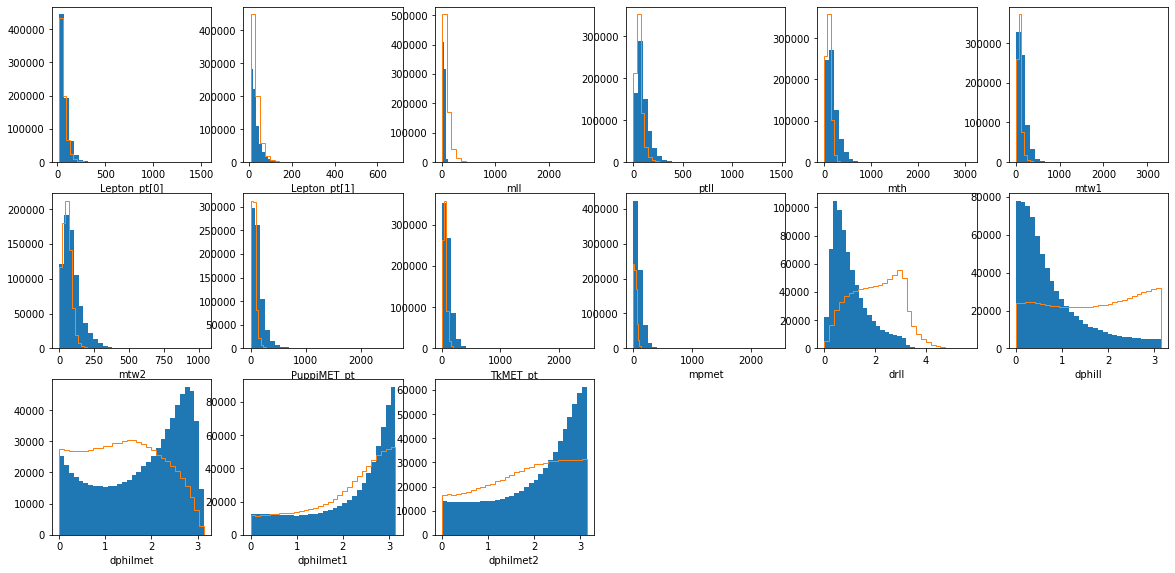

In [8]:
variable = ['Lepton_pdgId[0]', 'Lepton_pdgId[1]', 'Lepton_pt[0]','Lepton_pt[1]','mll', 'ptll', 'mth', 'mtw1', 'mtw2', 'PuppiMET_pt', 'TkMET_pt', 'mpmet', 'drll', 'dphill', 'dphilmet', 'dphilmet1', 'dphilmet2', 'type']
plt.figure(figsize=(20,20))
for i in range(2, signal_np.shape[1] - 1):
    plt.subplot(6,6,i-1)
    plt.hist(signal_np[:,i], bins=30)
    plt.hist(background_np[:,i], bins=30, histtype='step')
    plt.xlabel(variable[i])

In [9]:
all_data.shape

(1474387, 18)

In [10]:
X = all_data[:,2:17]
Y = all_data[:,17].astype(int)
X[0]

array([40.57024384, 18.08180237, 51.70274734, 35.60183334,  7.58304644,
       14.90722084, 51.70544052, 61.56505203,  4.84672022,  4.19101095,
        2.22293711,  2.07235718,  0.29939806,  0.29939806,  1.77295911])

In [11]:
for j in range(0,X.shape[1]):
    mean = np.mean(X[:,j])
    std = np.std(X[:,j])
    for i in range(0,X.shape[0]):
        X[i,j] = X[i,j] - mean
        X[i,j] = X[i,j] / std
X[0]

array([-0.57432258, -0.63981533, -0.12927266, -0.74422307, -1.19404796,
       -1.17293345, -0.40508814, -0.38394344, -1.21607319, -1.01256097,
        0.69840934,  0.91245354, -1.46600185, -2.03449909, -0.14678528])

In [12]:
# fraction of the data to assign to the test set
test_size = 0.01

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=0)

print('Size of X_train is: '+str(X_train.shape))
print('Size of X_test is: '+str(X_test.shape))

Size of X_train is: (1459643, 15)
Size of X_test is: (14744, 15)


In [13]:
X_train

array([[ 2.26672482,  1.6624396 ,  3.15939742, ..., -1.21545246,
         0.90181301, -1.53503923],
       [ 0.42896934,  1.05692953,  2.0016168 , ..., -0.86201357,
        -1.42467883,  0.55543007],
       [-0.99166948, -0.71687209, -0.44705975, ..., -0.28199499,
         0.8604123 , -0.60537664],
       ...,
       [ 1.20908905,  0.06104078, -0.79427798, ...,  1.60550494,
         1.06666552,  1.32492084],
       [-0.47798236, -0.05172244, -0.11835664, ..., -1.26308966,
        -1.82962762, -0.92534002],
       [ 0.25376353, -0.35903088, -0.68969694, ...,  0.85783433,
         0.58191174,  0.52981882]])

In [14]:
K.clear_session()

n_neurons = random.choice([128,256,512,1024])                                                                                            
n_layers = random.randint(5, 15)
lr = random.uniform(0, 0.00001)                                                                                                          
n_batch = random.choice([256,512,1024,2048]) 
print('Neurons:', n_neurons, 'Layers:', n_layers, 'Learning Rate:', lr, 'Batch:', n_batch)
model = Sequential()
model.add(layers.Dense(n_neurons, activation='relu',input_dim=X.shape[1]))

for i in range(0, n_layers):
    if i == 0:
        currentNeurons = n_neurons
    if random.choice([True, False]):
        model.add(layers.Dense(currentNeurons, activation='relu'))
    elif currentNeurons == 2:
        model.add(layers.Dense(currentNeurons, activation='relu'))
    else:
        currentNeurons = currentNeurons/2
        model.add(layers.Dense(currentNeurons, activation='relu'))
#model.add(Dense(15, activation='relu', input_dim=X.shape[1]))
#model.add(Dense(30, activation='relu'))
#model.add(Dense(30, activation='relu'))
#model.add(Dense(15, activation='relu'))
#model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


#lr=0.0001
n_epochs = 1000 # Number of epochs definition
decay = lr/n_epochs
model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(lr=lr, decay=decay), metrics=['accuracy'])

Neurons: 128 Layers: 9 Learning Rate: 9.058377815021053e-06 Batch: 1024


In [15]:
#n_batch = 512 # Batch size definition

start_time = time.time()

history = model.fit(X_train, Y_train, epochs=n_epochs,
          callbacks=[callbacks.EarlyStopping(monitor='val_loss',patience=20,verbose=1)],
          validation_split=0.05,
          batch_size=n_batch,
          verbose=2,
          shuffle= True)





print("Training duration : {0}".format(time.time() - start_time) + " secs")

Epoch 1/1000
1355/1355 - 4s - loss: 0.6310 - accuracy: 0.7129 - val_loss: 0.5391 - val_accuracy: 0.7623
Epoch 2/1000
1355/1355 - 3s - loss: 0.4655 - accuracy: 0.7771 - val_loss: 0.4246 - val_accuracy: 0.7831
Epoch 3/1000
1355/1355 - 3s - loss: 0.4125 - accuracy: 0.7874 - val_loss: 0.4054 - val_accuracy: 0.7879
Epoch 4/1000
1355/1355 - 3s - loss: 0.4018 - accuracy: 0.7904 - val_loss: 0.3994 - val_accuracy: 0.7901
Epoch 5/1000
1355/1355 - 3s - loss: 0.3975 - accuracy: 0.7922 - val_loss: 0.3966 - val_accuracy: 0.7921
Epoch 6/1000
1355/1355 - 3s - loss: 0.3953 - accuracy: 0.7932 - val_loss: 0.3951 - val_accuracy: 0.7928
Epoch 7/1000
1355/1355 - 3s - loss: 0.3940 - accuracy: 0.7939 - val_loss: 0.3941 - val_accuracy: 0.7935
Epoch 8/1000
1355/1355 - 3s - loss: 0.3931 - accuracy: 0.7944 - val_loss: 0.3936 - val_accuracy: 0.7938
Epoch 9/1000
1355/1355 - 3s - loss: 0.3925 - accuracy: 0.7947 - val_loss: 0.3932 - val_accuracy: 0.7942
Epoch 10/1000
1355/1355 - 3s - loss: 0.3920 - accuracy: 0.7950 -

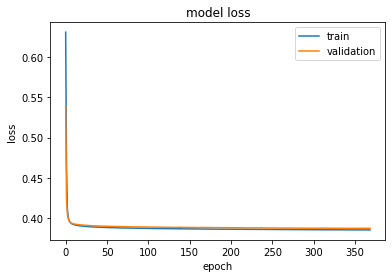

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
#plt.legend(['train'], loc='upper right')
plt.show()

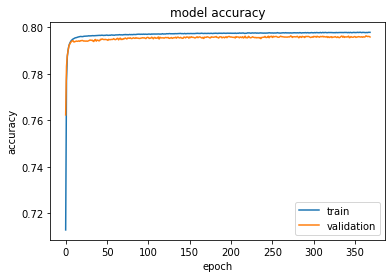

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
#plt.legend(['train'], loc='lower right')
plt.show()

In [18]:
scores = model.evaluate(X_test, Y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

461/461 [==============================] - 0s 514us/step - loss: 0.3874 - accuracy: 0.7983
Test loss: 0.38743361830711365
Test accuracy: 0.7982908487319946


In [19]:
Y_pred = model.predict(X_test)
roc_auc_score(Y_test, Y_pred)

0.8958221668985604

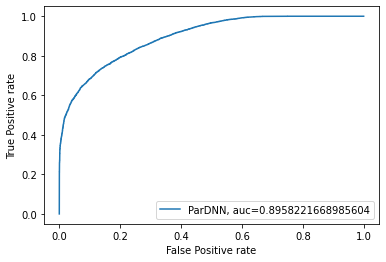

In [20]:
y_pred_proba = model.predict(X_test)
fpr, tpr, _ = roc_curve(Y_test,  y_pred_proba)
auc = roc_auc_score(Y_test, y_pred_proba)
plt.plot(fpr,tpr,label="ParDNN, auc="+str(auc))
plt.legend(loc=4)
plt.ylabel('True Positive rate')
plt.xlabel('False Positive rate')
plt.show()

[0.25954017 0.3846852  0.27242422 ... 0.39154997 0.2669824  0.4755154 ]
[0.9999763  0.51849335 0.8741174  ... 0.25501326 0.44023386 0.8044197 ]


Text(0.5, 0, 'DNN discriminant')

<Figure size 432x288 with 0 Axes>

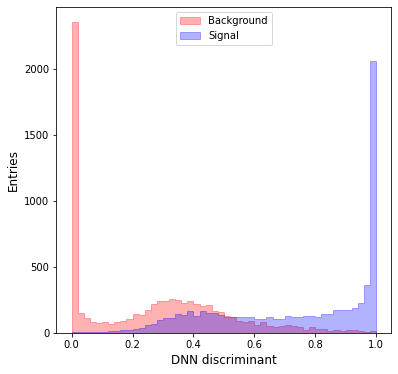

In [21]:
# Convert the y_pred and y_test numpy matrixes to 1-dimensional numpy arrays:
discriminant = np.squeeze(np.asarray(Y_pred))
true_labels = np.squeeze(np.asarray(Y_test))

# Get the discriminant values for each class (0: background, 1: signal):
discriminant0 = discriminant[list(true_labels == 0)]
print(discriminant0)
discriminant1 = discriminant[list(true_labels == 1)]
print(discriminant1)

# Define the binning:
binning = np.linspace(0, 1, 51)


# Plot the discriminant distributions:
plt.clf()
plt.figure(num=None, figsize=(6, 6))
plt.subplot(111)
pdf0, bins0, patches0 = plt.hist(discriminant0, bins = binning, color = 'r', alpha = 0.3, histtype = 'stepfilled', linewidth = 1, edgecolor='r', label = 'Background')
pdf1, bins1, patches1 = plt.hist(discriminant1, bins = binning, color = 'b', alpha = 0.3, histtype = 'stepfilled', linewidth = 1, edgecolor='b', label = 'Signal')
plt.legend(loc = 'upper center')
plt.ylabel('Entries', fontsize = 12)
plt.xlabel('DNN discriminant', fontsize = 12)

The optimal cut value is: 0.5108394


<Figure size 432x288 with 0 Axes>

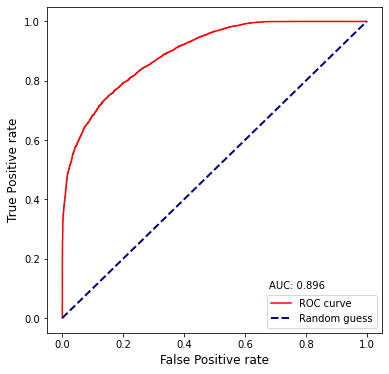

In [22]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_pred)
auc = metrics.auc(fpr, tpr)

plt.clf()
plt.figure(num=None, figsize=(6, 6))
plt.subplot(111)
plt.plot(fpr, tpr, color = 'r', label = "ROC curve")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label = "Random guess")
plt.legend(loc = "lower right")
plt.xlabel('False Positive rate', fontsize = 12)
plt.ylabel('True Positive rate', fontsize = 12)
plt.text(0.68, 0.1, 'AUC: %.3f' % auc)
#plt.savefig('Results/ROC.png', dpi =  600)


#### Optative and not explained (Youden index, cut value):
Youden_index = tpr - fpr
i_max = np.argmax(Youden_index)
cut_value = thresholds[i_max]

print("The optimal cut value is: " + str(cut_value))